In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV

In [11]:
df = pd.read_csv("Final_Train_Data.csv")

In [12]:
final_test_df = pd.read_csv("Final_Test_Data.csv")

In [56]:
sample_submition = pd.read_csv("gender_submission.csv")

In [24]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,22.0,1,0,7.2500,1,0,1
1,2,1.0,1,38.0,1,0,71.2833,0,0,0
2,3,1.0,3,26.0,0,0,7.9250,0,0,1
3,4,1.0,1,35.0,1,0,53.1000,0,0,1
4,5,0.0,3,35.0,0,0,8.0500,1,0,1


In [15]:
X = df.drop(['Survived','PassengerId'],axis=1)
final_test_df = final_test_df.drop('PassengerId',axis=1)

In [17]:
y = df['Survived']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [30]:
scaler = StandardScaler()

In [31]:
scaled_X_train = scaler.fit_transform(X_train)

In [32]:
scaled_X_test = scaler.transform(X_test)

In [62]:
scaled_final_test_df = scaler.transform(final_test_df)

In [46]:
def results(model):
    y_predictions = model.predict(scaled_X_test)
    print(accuracy_score(y_test,y_predictions))
    print(classification_report(y_test,y_predictions))

In [100]:
def final_predictions(model):
    final_y_prediction = model.predict(final_test_df).astype(int)
    final_y_prediction = pd.DataFrame(data=final_y_prediction,columns=['Survived'])
    final_submition = pd.concat([sample_submition['PassengerId'],final_y_prediction],axis=1,)
    final_submition.to_csv('Final_Submition.csv',index=False)

In [20]:
# AdBoost Model Predictions

In [91]:
from sklearn.ensemble import AdaBoostClassifier

In [92]:
error = []

for i in range(1,100):
    model = AdaBoostClassifier(n_estimators=i)
    model.fit(scaled_X_train,y_train)
    y_prediction = model.predict(scaled_X_test)
    
    err = 1 - accuracy_score(y_test,y_prediction)
    error.append(err)

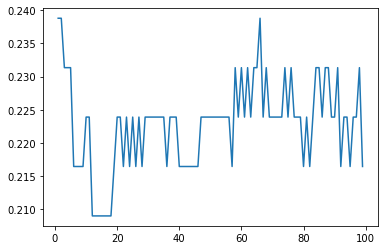

In [93]:
plt.plot(range(1,100),error)

In [94]:
ad_model = AdaBoostClassifier(n_estimators=12)

In [95]:
ad_model.fit(scaled_X_train,y_train)

AdaBoostClassifier(n_estimators=12)

In [96]:
results(ad_model)

0.7910447761194029
              precision    recall  f1-score   support

         0.0       0.74      0.91      0.82        70
         1.0       0.88      0.66      0.75        64

    accuracy                           0.79       134
   macro avg       0.81      0.79      0.79       134
weighted avg       0.81      0.79      0.79       134



In [101]:
final_predictions(ad_model)

In [68]:
# Random Forest MOdel Predictions

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf_model = RandomForestClassifier()

In [72]:
grid_param = {
    'n_estimators':[50,100,150,200,300],
    'criterion': ['gini','entropy'],
    'bootstrap': [True,False], 
}

In [73]:
rf_grid_model = GridSearchCV(estimator=rf_model,param_grid=grid_param)

In [74]:
rf_grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 150, 200, 300]})

In [75]:
rf_grid_model.best_params_

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 50}

In [76]:
results(rf_grid_model)

0.7835820895522388
              precision    recall  f1-score   support

         0.0       0.75      0.87      0.81        70
         1.0       0.83      0.69      0.75        64

    accuracy                           0.78       134
   macro avg       0.79      0.78      0.78       134
weighted avg       0.79      0.78      0.78       134



In [77]:
# GradientBoost Model Predictions

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
gb_model = GradientBoostingClassifier()

In [80]:
grid_param = {
    'n_estimators':[50,100,150,200],
    'max_depth':[3,4,5,6],
    'learning_rate':[0.1,0.05,0.2],
    'loss':['deviance', 'exponential'],
}

In [81]:
gb_grid_model = GridSearchCV(estimator=gb_model,param_grid=grid_param)

In [82]:
gb_grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200]})

In [83]:
results(gb_grid_model)

0.7985074626865671
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.82        70
         1.0       0.85      0.70      0.77        64

    accuracy                           0.80       134
   macro avg       0.81      0.79      0.80       134
weighted avg       0.81      0.80      0.80       134



In [88]:
final_predictions(gb_grid_model)

In [102]:
final_submittion = pd.read_csv("Final_Submition.csv")

In [104]:
final_submittion['Survived'].value_counts()

0    418
Name: Survived, dtype: int64